In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Superstore_sales_Data.csv")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
def sale_tot(Customer_name):
    df = data[data["Customer Name"] == Customer_name]
    value = sum(df["Sales"])
    return value
    
sale_tot("Claire Gute")

1148.7800000000002

In [7]:
def cat_list(Customer_name):
    df = data[data["Customer Name"] == Customer_name]
    df = df[['Category','Sales']]
    print(df.head())
    value = df.groupby(['Category'])['Sales'].sum().reset_index()
    # value = df["Category"].value_counts()
    return value
    
cat_list("Claire Gute")

             Category    Sales
0           Furniture  261.960
1           Furniture  731.940
5491  Office Supplies   18.160
6877        Furniture  131.376
6878  Office Supplies    5.344


,Category,Sales
0,Furniture,1125.276
1,Office Supplies,23.504


In [8]:
data['Category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [4]:
df_sales = data[['Order Date','Sales']]
df_sales.head()

,Order Date,Sales
0,08/11/2017,261.9600
1,08/11/2017,731.9400
2,12/06/2017,14.6200
3,11/10/2016,957.5775
4,11/10/2016,22.3680


In [6]:
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], infer_datetime_format=True)
df_sales.head()

<ipython-input-6-50e84407ff14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], infer_datetime_format=True)


,Order Date,Sales
0,2017-08-11,261.9600
1,2017-08-11,731.9400
2,2017-12-06,14.6200
3,2016-11-10,957.5775
4,2016-11-10,22.3680


In [8]:
df_sales.dtypes

Order Date    datetime64[ns]
Sales                float64
dtype: object

In [9]:
df_sales=df_sales.groupby(['Order Date']).agg({
'Sales': lambda price: price.sum()})

In [11]:
df_sales.reset_index(inplace=True)
df_sales

,Order Date,Sales
0,2015-01-02,468.9000
1,2015-01-03,2203.1510
2,2015-01-04,119.8880
3,2015-01-06,5188.5200
4,2015-01-07,601.0240
...,...,...
1225,2018-12-26,814.5940
1226,2018-12-27,177.6360
1227,2018-12-28,1657.3508
1228,2018-12-29,2915.5340


In [12]:
df_sales.columns = ['ds', 'y']
df_sales.head()

,ds,y
0,2015-01-02,468.900
1,2015-01-03,2203.151
2,2015-01-04,119.888
3,2015-01-06,5188.520
4,2015-01-07,601.024


In [13]:
from prophet import Prophet
p = Prophet(interval_width=0.92, daily_seasonality=True)
model = p.fit(df_sales)

INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
future = p.make_future_dataframe(periods=200, freq='D')

In [15]:
forecast_prediction = p.predict(future)

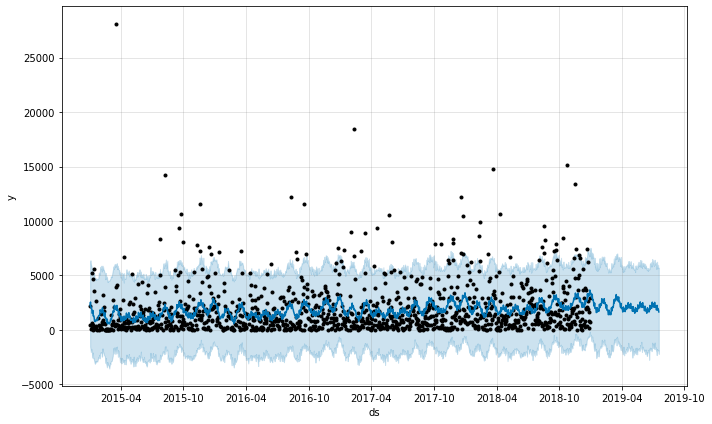

In [16]:
plot1 = p.plot(forecast_prediction)

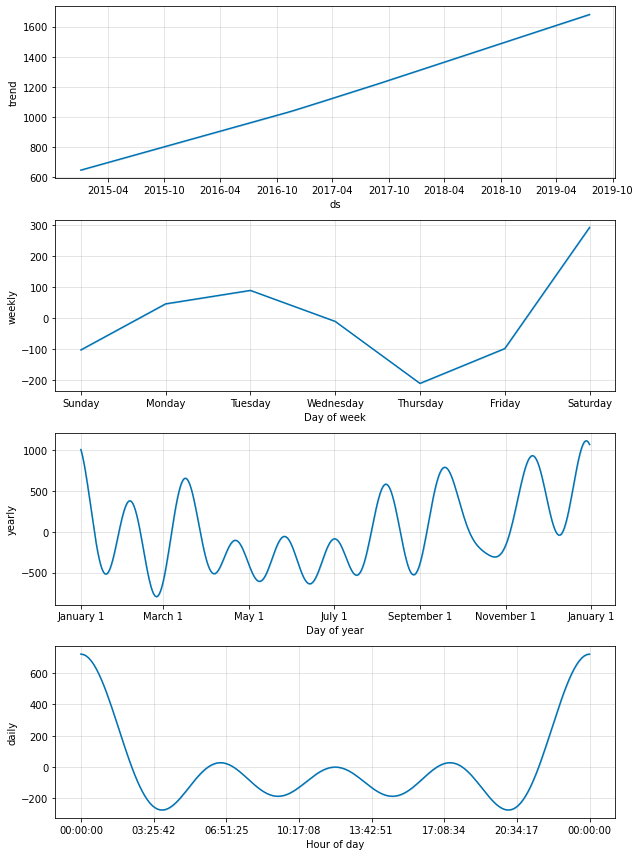

In [17]:
plot2 = p.plot_components(forecast_prediction)

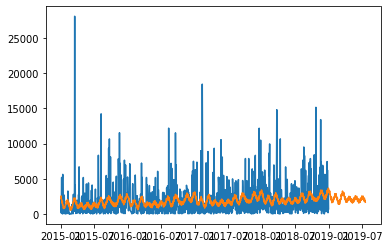

In [18]:
import matplotlib.pyplot as plt

plt.plot(df_sales.ds, df_sales.y)
plt.plot(forecast_prediction.ds, forecast_prediction.yhat)

plt.show()

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Data Preparation

In [27]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
df_prep = data[['Order Date','Ship Date','Ship Mode','Segment','Country','City','State','Region','Category','Sub-Category','Sales']]

In [5]:
df_prep.head(2)

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales
0,08/11/2017,11/11/2017,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96
1,08/11/2017,11/11/2017,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.94


In [6]:
df_prep['Order Date'] = pd.to_datetime(df_prep['Order Date'], infer_datetime_format=True)
df_prep['Ship Date'] = pd.to_datetime(df_prep['Ship Date'], infer_datetime_format=True)
df_prep.info()

c:\Users\saurav\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\saurav\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\saurav\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\saurav\AppData\Local\Programs\Python\Python38\lib\site-packag

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9800 non-null   datetime64[ns]
 1   Ship Date     9800 non-null   datetime64[ns]
 2   Ship Mode     9800 non-null   object        
 3   Segment       9800 non-null   object        
 4   Country       9800 non-null   object        
 5   City          9800 non-null   object        
 6   State         9800 non-null   object        
 7   Region        9800 non-null   object        
 8   Category      9800 non-null   object        
 9   Sub-Category  9800 non-null   object        
 10  Sales         9800 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 842.3+ KB


In [7]:
df_prep['Ship Mode'].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

In [10]:
df_prep['State'].value_counts()

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada        

In [8]:
df_prep['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

In [9]:
df_prep['City'].value_counts()

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: City, Length: 529, dtype: int64

In [11]:
df_prep['Region'].value_counts()

West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64

In [12]:
df_prep.head(2)

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales
0,2017-08-11,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96
1,2017-08-11,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.94


In [13]:
encode = ['Ship Mode','Segment','Country','City','State','Region','Category','Sub-Category']
for col in encode:
    dummy = pd.get_dummies(df_prep[col], prefix=col)
    df_prep = pd.concat([df_prep,dummy], axis=1)
    del df_prep[col]

In [14]:
df_prep.shape

(9800, 613)

In [16]:
list(df_prep.columns)

['Order Date',
 'Ship Date',
 'Sales',
 'Ship Mode_First Class',
 'Ship Mode_Same Day',
 'Ship Mode_Second Class',
 'Ship Mode_Standard Class',
 'Segment_Consumer',
 'Segment_Corporate',
 'Segment_Home Office',
 'Country_United States',
 'City_Aberdeen',
 'City_Abilene',
 'City_Akron',
 'City_Albuquerque',
 'City_Alexandria',
 'City_Allen',
 'City_Allentown',
 'City_Altoona',
 'City_Amarillo',
 'City_Anaheim',
 'City_Andover',
 'City_Ann Arbor',
 'City_Antioch',
 'City_Apopka',
 'City_Apple Valley',
 'City_Appleton',
 'City_Arlington',
 'City_Arlington Heights',
 'City_Arvada',
 'City_Asheville',
 'City_Athens',
 'City_Atlanta',
 'City_Atlantic City',
 'City_Auburn',
 'City_Aurora',
 'City_Austin',
 'City_Avondale',
 'City_Bakersfield',
 'City_Baltimore',
 'City_Bangor',
 'City_Bartlett',
 'City_Bayonne',
 'City_Baytown',
 'City_Beaumont',
 'City_Bedford',
 'City_Belleville',
 'City_Bellevue',
 'City_Bellingham',
 'City_Bethlehem',
 'City_Beverly',
 'City_Billings',
 'City_Bloomington'

In [20]:
df_prep.head(2)

,Order Date,Ship Date,Sales,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,2017-08-11,2017-11-11,261.96,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-08-11,2017-11-11,731.94,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_prep.shape

(9800, 613)

In [23]:
df_prep['final'] = df_prep['Sales']
del df_prep['Sales']
df_prep['Sales'] = df_prep['final']
del df_prep['final']
df_prep.shape

(9800, 613)

In [24]:
df_prep.head(2)

,Order Date,Ship Date,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Country_United States,...,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Sales
0,2017-08-11,2017-11-11,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,261.96
1,2017-08-11,2017-11-11,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,731.94


In [3]:
data.shape

(9800, 18)

In [4]:
df_lab = data[['Order Date','Ship Date','Ship Mode','Customer Name','Segment','Country','City','State','Region','Category','Sub-Category','Sales']]

In [5]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_lab['Ship Mode']= label_encoder.fit_transform(df_lab['Ship Mode'])
df_lab['Customer Name']= label_encoder.fit_transform(df_lab['Customer Name'])
df_lab['Segment']= label_encoder.fit_transform(df_lab['Segment'])
df_lab['Country']= label_encoder.fit_transform(df_lab['Country'])
df_lab['City']= label_encoder.fit_transform(df_lab['City'])
df_lab['State']= label_encoder.fit_transform(df_lab['State'])
df_lab['Region']= label_encoder.fit_transform(df_lab['Region'])
df_lab['Category']= label_encoder.fit_transform(df_lab['Category'])
df_lab['Sub-Category']= label_encoder.fit_transform(df_lab['Sub-Category'])

<ipython-input-5-5c78b9a0a7ca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lab['Ship Mode']= label_encoder.fit_transform(df_lab['Ship Mode'])
<ipython-input-5-5c78b9a0a7ca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lab['Customer Name']= label_encoder.fit_transform(df_lab['Customer Name'])
<ipython-input-5-5c78b9a0a7ca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [6]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     9800 non-null   object 
 1   Ship Date      9800 non-null   object 
 2   Ship Mode      9800 non-null   int32  
 3   Customer Name  9800 non-null   int32  
 4   Segment        9800 non-null   int32  
 5   Country        9800 non-null   int32  
 6   City           9800 non-null   int32  
 7   State          9800 non-null   int32  
 8   Region         9800 non-null   int32  
 9   Category       9800 non-null   int32  
 10  Sub-Category   9800 non-null   int32  
 11  Sales          9800 non-null   float64
dtypes: float64(1), int32(9), object(2)
memory usage: 574.3+ KB


In [7]:
df_lab['Order Date'] = pd.to_datetime(df_lab['Order Date'])
df_lab['Ship Date'] = pd.to_datetime(df_lab['Ship Date'])
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9800 non-null   datetime64[ns]
 1   Ship Date      9800 non-null   datetime64[ns]
 2   Ship Mode      9800 non-null   int32         
 3   Customer Name  9800 non-null   int32         
 4   Segment        9800 non-null   int32         
 5   Country        9800 non-null   int32         
 6   City           9800 non-null   int32         
 7   State          9800 non-null   int32         
 8   Region         9800 non-null   int32         
 9   Category       9800 non-null   int32         
 10  Sub-Category   9800 non-null   int32         
 11  Sales          9800 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int32(9)
memory usage: 574.3 KB


c:\Users\saurav\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\saurav\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\saurav\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\saurav\AppData\Local\Programs\Python\Python38\lib\site-packag

<AxesSubplot:>

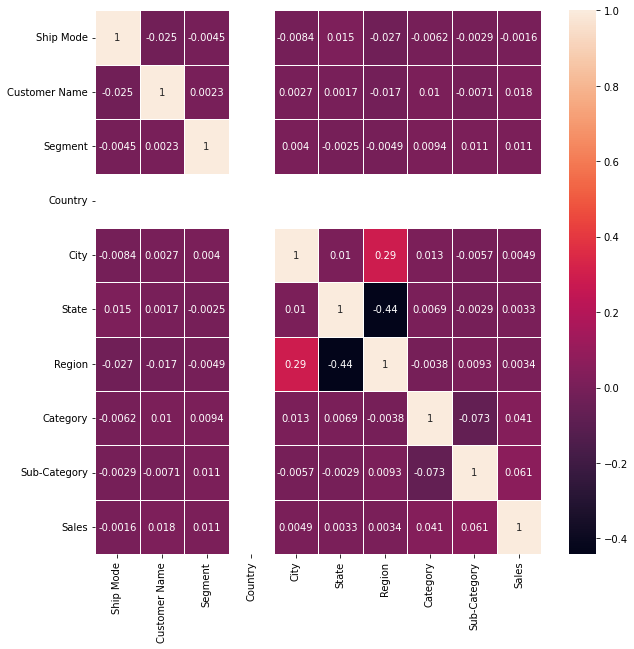

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df_lab.corr(), annot=True, linewidths=.5, ax=ax)